In [51]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

DICCIONARIO_REGIONES = {1: 'EastEurope',
                        2: 'LatAm',
                        3: 'NorthAfrica',
                        4: 'SubSaharian',
                        5: 'WesternDem',
                        6: 'EastAsia',
                        7: 'SouthEastAsia',
                        8: 'SouthAsia',
                        9: 'Pacific',
                        10: 'Caribbean'}

SEMILLA_PSEUDOALEATORIA = '0115'
COLUMNAS_SALUD = ['wef_imort', 'who_alc2000', 'who_tobt', 'wdi_exph']

In [64]:
def obtener_mitad_casos_df(largo_df):
    """Funcion para obtener el 50% de los indices de un pandas dataframe. Los indices se eligen
    de forma aleatoria

    :param largo_df: Es el largo (len) del dataframe que se quiere obtener su 50% de registros
    :type largo_df: int

    :return: Retorna una lista de indices aleatorios 
    :rtype: list
    """
    # Primero seria obtener el rango de indexes del df
    # Después sería obtener cuantos elementos se requieren
    # Después sería obtener la cantidad de elementos, pero sin repetirse
    cincuenta_porciento_casos = int(round(largo_df / 2, 0))
    indices_a_elegir = (random.sample(
        range(largo_df), cincuenta_porciento_casos))
    return indices_a_elegir


def obtener_submuestra(df):
    """Funcion para obtener una submuestra de un dataframe. La muestra contiene el 50% de los
    registros originales del dataframe, y se eligen de forma aleatoria

    :param df: Dataframe de donde se quiere obtener una submuestra
    :type df: pd.DataFrame

    :return: Submuestra del Dataframe original, que contiene el 50% de los registros
    :rtype: pd.DataFrame
    """
    random.seed(SEMILLA_PSEUDOALEATORIA)

    columnas_a_utilizar = ['undp_hdi', 'ccodealp', 'ht_region', 'gle_cgdpc',
                           'imf_pop'] + COLUMNAS_SALUD

    casos_a_obtener = obtener_mitad_casos_df(df.shape[0])
    df_cincuenta_casos = df.iloc[casos_a_obtener]
    df_cincuenta_columnas_a_utilizar = df_cincuenta_casos[columnas_a_utilizar]

    df_cincuenta_columnas_a_utilizar['ht_region'] = df_cincuenta_columnas_a_utilizar['ht_region'].replace(
        DICCIONARIO_REGIONES)

    return df_cincuenta_columnas_a_utilizar


def obtener_descripciones_variables(df_a_describir):
    """Funcion para mostrar los descriptores estadisticos de tendencia central de las variables
    continuas, ademas de las frecuencias de los valores de variables discretas de un Dataframe

    :param df_a_describir: Dataframe que se quiere describir
    :type df_a_describir: pd.DataFrame

    :return: Nada
    :rtype: None
    """
    descripcion_variables_continuas = df_a_describir.describe()
    print(descripcion_variables_continuas)

    variables_continuas = descripcion_variables_continuas.columns
    variables_discretas = set(df_a_describir.columns) - set(variables_continuas)

    for variable_discreta in variables_discretas:
        print(df_a_describir[variable_discreta].value_counts())


def calcular_observaciones_perdidas(dataframe, var, print_list=False):
    """Funcion que retorna la cantidad y el porcentaje de datos faltantes en una columna de un
    DataFrame. Ademas, puede retornar una lista detallada de la frecuencia/porcentaje de los valores
    de la columna a analizar

    :param dataframe: Dataframe en donde se quiere observar la cantidad de valores faltantes
    :type dataframe: pd.DataFrame

    :param var: Nombre de la columna que se quiere analizar dentro del DataFrame
    :type var: str

    :param print_list: Booleano que indica si es que se quiere imprimir la frecuencia de valores
    de la columna var
    :type print_list: Bool

    :return: Una tupla con la cantidad de valores faltanes, el porcentaje de valores faltantes y,
    opcionalemnte, la lista de valores de la columna var
    :rtype: tuple
    """
    cantidad_lista_nan = dataframe[var].value_counts(dropna=False)
    porcentaje_lista_nan = dataframe[var].value_counts('%', dropna=False)

    if np.nan in cantidad_lista_nan.index:
        cantidad_nan = cantidad_lista_nan[np.nan]
        porcentaje_nan = porcentaje_lista_nan[np.nan]

    else:
        cantidad_nan = 0
        porcentaje_nan = 0

    if print_list:
        registros_faltantes = dataframe[dataframe[var].isna()]
        lista_paises_faltantes = registros_faltantes['ccodealp'].unique()
        return cantidad_nan, porcentaje_nan, lista_paises_faltantes

    else:
        return cantidad_nan, porcentaje_nan


def graficar_histograma(sample_df, full_df, var, true_mean, sample_mean=False):
    """Funcion que grafica la distribucion de datos de una columna presente en un DataFrame obtenido
    desde un DataFrame mas grande

    :param sample_df: Muestra de full_df que se grafica en el histograma
    :type sample_df: pd.DataFrame

    :param full_df: Dataframe completo de donde se obtiene sample_df 
    :type full_df: pd.DataFrame

    :param var: Columna de sample_df que se quiere graficar su distribucion
    :type var: str

    :param true_mean: Valor booleano que indica si se quiere graficar la media 
    de la columna var en full_df
    :type true_mean: Bool

    :param true_mean: Valor booleano que indica si se quiere graficar la media 
    de la columna var en sample_df
    :type true_mean: Bool

    :return: Nada
    :rtype: None
    """
    plt.hist(sample_df[var])

    if sample_mean:
        plt.axvline(sample_df[var].mean(), color='yellow')

    if true_mean:
        plt.axvline(full_df[var].mean(), color='red')

    plt.show()


def graficar_dotplot_variable(dataframe, plot_var, plot_by, statistic='mean', global_stat=False):
    """Funcion que grafica la media/mediana de una variable, luego de haber agrupado un DataFrame
    por el parametro plot_by

    :param dataframe: DataFrame que contiene los datos que se quieren graficar
    :type dataframe: pd.DataFrame

    :param plot_var: Variable que se quiere graficar, que esta presente en dataframe
    :type plot_var: str

    :param plot_by: Columna que se utilizara para agrupar el dataframe y que correspondera al eje x
    del grafico 
    :type plot_by: str

    :param statistic: Valor estadistico que se quiere graficar. Puede ser mean o median
    :type statistic: str

    :param global_stat: Valor booleano que indica si se quiere graficar la media global de la
    variable plot_var en dataframe previo a la agrupacion
    :type global_stat: Bool

    :return: Nada
    :rtype: None
    """
    df_agrupado = dataframe.groupby(plot_by)[plot_var]

    if statistic == 'mean':
        df_agrupado = df_agrupado.mean()
        medida_global = dataframe[plot_var].mean()

    elif statistic == 'median':
        df_agrupado = df_agrupado.median()
        medida_global = dataframe[plot_var].median()

    plt.plot(df_agrupado, 'o')
    plt.xticks(rotation=90)
    plt.ylabel(statistic)
    plt.title(
        f'Statistic: {statistic}\nVariable: {plot_var}\nAgrupado por: {plot_by}')

    if global_stat:
        plt.axhline(medida_global)

    plt.show()


In [65]:
# Con las siguientes lineas se obtuvo el diccionario que relaciona las regiones con sus codigos

# unidas = df_submuestra.merge(df_auxiliar, how='inner', on='ccodealp')
# DICCIONARIO_REGIONES = dict(unidas.groupby(by=['ht_region_x', 'ht_region_y']).sum().index)

In [66]:
df = pd.read_csv('qog_std_cs_jan18.csv')
df_auxiliar = pd.read_csv('subsample_isz.csv')

In [67]:
df_submuestra = obtener_submuestra(df)
obtener_descripciones_variables(df_submuestra)

# La descripcion de las variables gle_cgdpc, undp_hdi e imf_pop se muestran en las columnas
# mostradas abajo

        undp_hdi      gle_cgdpc     imf_pop   wef_imort  who_alc2000  \
count  91.000000      96.000000   75.000000   77.000000    87.000000   
mean    0.693110   13141.156818   22.851093   24.360189     4.753908   
std     0.142295   17773.468801   39.279938   24.648970     3.864448   
min     0.421000     332.269990    0.012000    1.800000     0.000000   
25%     0.594000    2866.250000    1.292000    7.200000     1.355000   
50%     0.719000    6682.109850    6.880000   14.700000     3.780000   
75%     0.793000   16388.190000   27.767500   35.700001     8.080000   
max     0.938000  108481.130000  202.768997  117.400002    15.190000   

        who_tobt   wdi_exph  
count  61.000000  94.000000  
mean   23.875410   6.768343  
std     9.307822   2.713152  
min     7.000000   1.475303  
25%    16.200001   4.849392  
50%    23.799999   6.428007  
75%    30.299999   8.287694  
max    48.900002  17.135723  
SubSaharian      23
EastEurope       20
NorthAfrica      13
WesternDem       11
L

C:\Users\Javier\AppData\Local\Temp\ipykernel_4592\1970441215.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cincuenta_columnas_a_utilizar['ht_region'] = df_cincuenta_columnas_a_utilizar['ht_region'].replace(


In [69]:
for variable in df_submuestra.columns:
    cantidad_na, porcentaje_na, lista_na = calcular_observaciones_perdidas(
        df_submuestra, variable, True)
    
    print(f'El porcentaje de na de {variable} es {porcentaje_na * 100}')

print()
# Segun los resultados, las 3 variables (continuas) con mayor porcentaje de na son:
variables_con_mas_na = ['who_tobt', 'imf_pop', 'wef_imort']

# Ademas, las variables con la menor cantidad de na son:
variables_con_menos_na = ['gle_cgdpc', 'wdi_exph', 'undp_hdi']

for variable in variables_con_mas_na:
    cantidad_na, porcentaje_na, lista_na = calcular_observaciones_perdidas(
        df_submuestra, variable, True)
    
    print(f'Los paises que tienen valores faltantes para {variable} son:\n{lista_na}')

El porcentaje de na de undp_hdi es 6.185567010309279
El porcentaje de na de ccodealp es 0
El porcentaje de na de ht_region es 0
El porcentaje de na de gle_cgdpc es 1.0309278350515463
El porcentaje de na de imf_pop es 22.68041237113402
El porcentaje de na de wef_imort es 20.618556701030926
El porcentaje de na de who_alc2000 es 10.309278350515463
El porcentaje de na de who_tobt es 37.11340206185567
El porcentaje de na de wdi_exph es 3.0927835051546393

Los paises que tienen valores faltantes para who_tobt son:
['BTN' 'DJI' 'TWN' 'GMB' 'CIV' 'MKD' 'VUT' 'SSD' 'LBY' 'BWA' 'GRD' 'AFG'
 'AGO' 'SLB' 'SMR' 'TLS' 'DZA' 'RWA' 'NIC' 'SUR' 'MCO' 'SYR' 'GTM' 'ARE'
 'TKM' 'PLW' 'PNG' 'TJK' 'LIE' 'MHL' 'ZWE' 'FSM' 'TUN' 'PRK' 'MNE' 'SLV']
Los paises que tienen valores faltantes para imf_pop son:
['NAM' 'DJI' 'GMB' 'SSD' 'BWA' 'GRD' 'CRI' 'LSO' 'LBR' 'COG' 'HND' 'MCO'
 'SYR' 'GTM' 'ARE' 'TKM' 'IND' 'DOM' 'LIE' 'TUN' 'PRK' 'SLV']
Los paises que tienen valores faltantes para wef_imort son:
['DJI' 'TON' 

Graficando la variable wef_imort


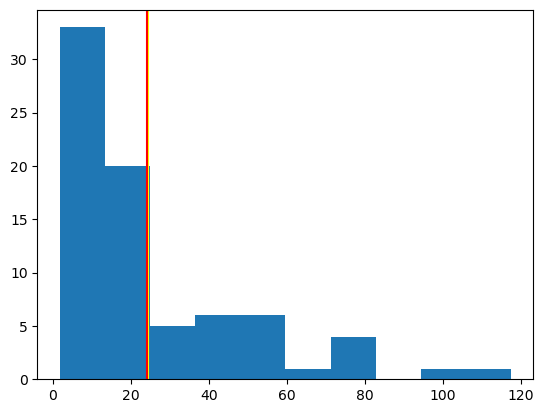

Graficando la variable who_alc2000


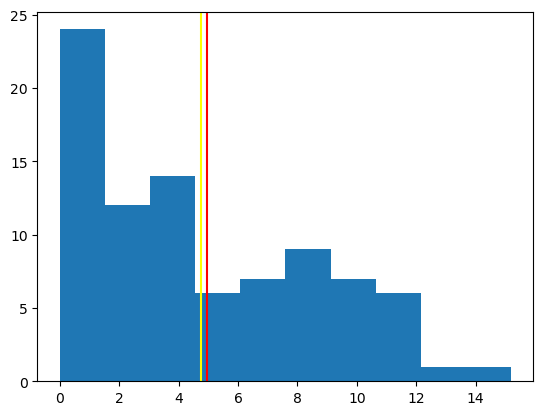

Graficando la variable who_tobt


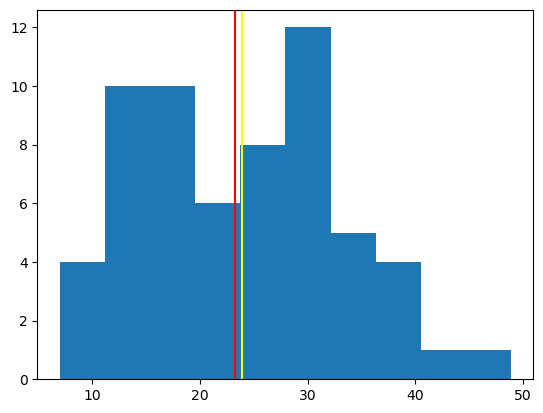

Graficando la variable wdi_exph


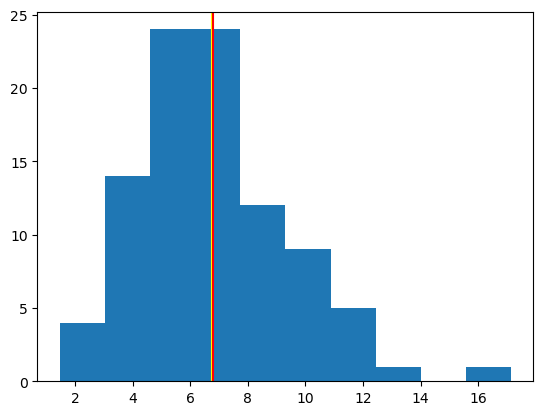

In [57]:
for variable_salud in COLUMNAS_SALUD:
    print(f'Graficando la variable {variable_salud}')
    graficar_histograma(df_submuestra, df, variable_salud, True, True)

# Amarillo para muestra y Rojo para total

# Segun los resultados, las variables wef_import y who_tobt tienen una media mayor
# en su muestra que en el dataframe completo

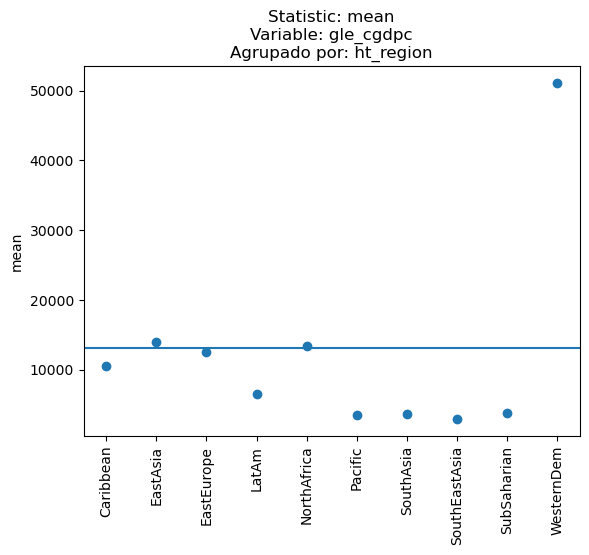

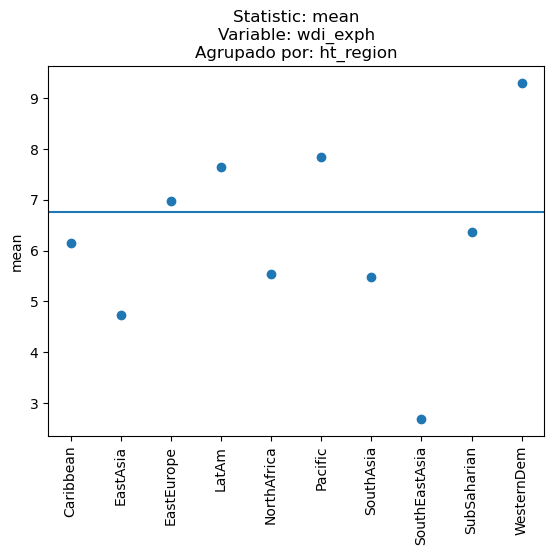

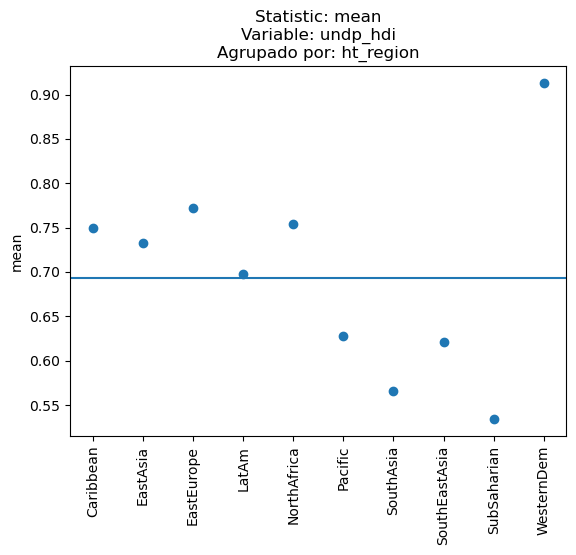

In [61]:
for variable in variables_con_menos_na:
    graficar_dotplot_variable(df_submuestra, variable, 'ht_region', 'mean', global_stat=True)

In [62]:
df_submuestra.to_csv('subsample_JARB_demo.csv')